### Week2授業前課題1  小麦とチェス盤問題

In [2]:
'''
モジュールのインポート
'''
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

- ndarray の定義
    > An ndarray is a (usually fixed-size) multidimensional container of items of the same type and size.
    >
    > ndarrayは、同じ型やサイズで構成された複数要素の、たいてい一定の大きさを持つ多次元の容れ物である。
- ndarray の特徴
    - 同じ型を持つ要素しか格納することができない
    - 各次元ごとの（2次元なら列ごとや行ごと）の要素数は必ず一定
    - C言語を元に、最適化された行列演算を行うため効率的な処理をすることができる
 
#### ndarrayにすることで、多次元データを扱うための便利な属性を使用することができるようになります。

#### 【問題1】2×2マスのチェス盤の小麦の数

In [3]:
'''
ndarray 配列での形状変換(reshape)
'''
small_board_list = [2**i for i in range(4)]
small_board_ndarray = np.array(small_board_list)
small_board_ndarray = small_board_ndarray.reshape(2, 2)
print("配列の要素\n{}".format(small_board_ndarray))
print("配列の形状：{}".format(small_board_ndarray.shape))
print("配列の次元数:{}".format(np.ndim(small_board_ndarray)))

配列の要素
[[1 2]
 [4 8]]
配列の形状：(2, 2)
配列の次元数:2


#### 【問題2】n×mマスへの拡張

In [10]:
'''
n x mマスのチェス盤の小麦の数を記したndarrayを返す関数 &
8 x 8マスのチェス盤の小麦の数を求めるコード
'''
# 行列の要素数を求める
def chess_matrix_num():
    while True:
        try:
            row = int(input("行の数を入力してください ： "))
            col = int(input("列の数を入力してください ： "))
            break
        except ValueError:
            print ("エラー：数字以外の文字を入力しないでください。")
    
    return row, col

# 小麦の数を計算する
def wheat_num(row, col):
    n = 0 # カウント用
    wheat_ndarray = np.array([1], dtype='uint64')  # 小麦の数を格納するためのリスト
    
    for i in range(row*col - 1):
            wheat_ndarray = np.append(wheat_ndarray, wheat_ndarray[-1]*2)
    
    return wheat_ndarray.reshape(row, col)

row, col = chess_matrix_num()
wheat_ndarray = wheat_num(row, col)
print("配列の要素:\n{}".format(wheat_ndarray))
print("配列の形状：{}".format(wheat_ndarray.shape))
print("配列の次元数:{}".format(np.ndim(wheat_ndarray)))

行の数を入力してください ： 3
列の数を入力してください ： 3
配列の要素:
[[  1.   2.   4.]
 [  8.  16.  32.]
 [ 64. 128. 256.]]
配列の形状：(3, 3)
配列の次元数:2


#### 【問題3】小麦の数の合計

小麦の数の合計：1.8446744073709552e+19


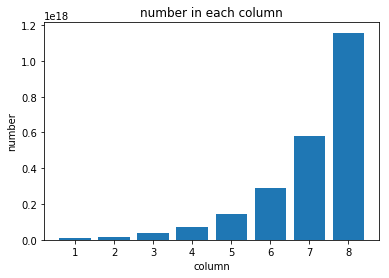

In [5]:
'''
8 x 8マスのチェス盤の小麦の数の合計を求める &
各列の平均を求め、それを棒グラフで可視化するコード
'''
row, col = 8, 8 # 行数, 列数
wheat_ndarray = wheat_num(row, col)
sum_wheat = np.sum(wheat_ndarray)
print("小麦の数の合計：{}".format(sum_wheat))

plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(1, col + 1), np.mean(wheat_ndarray, axis=0))
plt.show()

- memo
    - 1e+0 = 1
    - 1e+1 = 10
    - 1e+2 = 100

#### 【問題4】小麦の数のヒートマップ

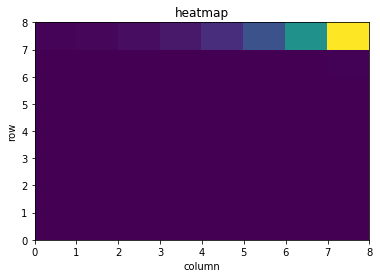

In [6]:
'''
8×8マスのチェス盤の小麦の数をヒートマップとして可視化するコード
'''
row, col = 8, 8 # 行数, 列数

plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(np.array(wheat_num(row, col)))
plt.show()

#### 【問題5】後半は前半の何倍か

In [7]:
'''
チェス盤の後半にある小麦の数は前半にある小麦の数の何倍かを求めるコード
'''
row, col = 8, 8 # 行数, 列数
wheat_ndarray = wheat_num(row, col)
wheat_ndarray = wheat_ndarray.astype(np.uint64)
chess_upper_sum = wheat_ndarray[0:4, 0:8].sum()
chess_lower_sum = wheat_ndarray[4:8, 0:8].sum()

print("チェス盤の後半にある小麦の数は前半にある小麦の数の{}倍です。" \
.format(chess_lower_sum / chess_upper_sum))

チェス盤の後半にある小麦の数は前半にある小麦の数の4294967296.0倍です。


- memo
    - 乱数生成
        - np.random.randint(0, 5, size=(3, 3))  
          0 〜 4 までの乱数を 3 * 3 の行列を作成
    - 行列の範囲指定の合計
        - np.array[0:2, 2:3].sum()  
          0 〜 1行目で２列目を表示
    - データ型
        - [NumPyにおける要素のデータ型dtypeの種類と指定方法](https://deepage.net/features/numpy-dtype.html)

#### 【問題6】他の計算方法によるn×mマスへの拡張

In [8]:
'''
n x mマスのチェス盤の小麦の数を記したndarrayを返す関数(append)
'''
# 小麦の数を計算する関数(append)
def wheat_num_1(row, col):
    wheat_ndarray = np.array([1])  # 小麦の数を格納するための配列
    
    for i in range(row*col - 1):
            wheat_ndarray = np.append(wheat_ndarray, wheat_ndarray[-1]*2)
    
    return wheat_ndarray.reshape(row, col)

row, col = chess_matrix_num()
wheat_ndarray = wheat_num_1(row, col)
print("配列の要素:\n{}".format(wheat_ndarray))
print("配列の形状：{}".format(wheat_ndarray.shape))
print("配列の次元数:{}".format(np.ndim(wheat_ndarray)))

行の数を入力してください ： 3
列の数を入力してください ： 3
配列の要素:
[[  1   2   4]
 [  8  16  32]
 [ 64 128 256]]
配列の形状：(3, 3)
配列の次元数:2


In [9]:
'''
n x mマスのチェス盤の小麦の数を記したndarrayを返す関数(ブロードキャスト)
'''
# 小麦の数を計算する関数(ブロードキャスト)
def wheat_num_1(row, col):
    wheat_ndarray = 2**np.arange(row*col)
    
    return wheat_ndarray.reshape(row, col)

row, col = chess_matrix_num()
wheat_ndarray = wheat_num_1(row, col)
print("配列の要素:\n{}".format(wheat_ndarray))
print("配列の形状：{}".format(wheat_ndarray.shape))
print("配列の次元数:{}".format(np.ndim(wheat_ndarray)))

行の数を入力してください ： 3
列の数を入力してください ： 3
配列の要素:
[[  1   2   4]
 [  8  16  32]
 [ 64 128 256]]
配列の形状：(3, 3)
配列の次元数:2
